# 1 | Class Session B | Team coding: Faking defocus
**ES143 Computer Vision, Harvard University, Fall 2020**

Name: **Wisoo Song, Runjia Tian**

---

To maximize your learning, you and your teamate(s) must each create and maintain your own active notebooks. However, this task is an open collaboration, so it is acceptable for you to look at each other's code (i.e., screen share) during development and debugging.

When you are done: 
1. Post one or more of your team's output images to [padlet](https://padlet.com/zickler/fakingdefocus). Be sure to include your names in the title or description of your post.
2. Have each team member submit their `.ipynb` and `.html` files [here](https://canvas.harvard.edu/courses/78234/assignments/402612) in Canvas. Filenames should be of the form `defocus_lastname_firstname.ipynb` and `defocus_lastname_firstname.html`. 

---

Your task is to fake a small depth of field by selectively applying convolution to an input all-focus image that is captured by small-aperture camera on a smartphone. There are two inputs: 1) an all-focus color image (a HxWx3 array); and 2) an accompanying depth map (a HxWx1 array) that represents the relative distance of objects in front of the camera.

The input files that are required to complete this task are in the `1_FakingDefocus.zip` archive that accompanies this notebook in canvas. Be sure to upload this ZIP archive to the same directory as your notebook before running its first cell (which unpacks the archive into the same folder your notebook is in). 

Reminder of links to documentation: [Python](https://docs.python.org/3.7/), [OpenCV](https://opencv.org/), [numpy, scipy](https://docs.scipy.org/doc/numpy/reference/), and [matplotlib](https://matplotlib.org/). 

You are likely to need help during this breakout task. To request a visit to your breakout room, post to the #fakingdefocus channel in Slack (e.g., Can we get some help in Breakout 3?)

***

The next few cells unzip the assignment's zip file and import some useful packages. They also set figure sizes so that they're easier to see in the notebook. You can manually change the size of a figure by calling `plt.figure(figsize=[H, W])`, where `H` and `W` are the height and width of the window.

In [1]:
# Extract zip file. This results in two images in a directory named ./data/
# ! unzip -n 1_FakingDefocus.zip

# Feel free to delete this cell after running to prevent unzipping again when restarting kernel and running all cells.

In [2]:
# Import any required libraries here
import cv2                               # OpenCV
import numpy as np                       # numpy
import scipy.signal                      # Signal package from scipy for convolution
import os

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters or use plt.figure(figsize=[H, W]) before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

## Work here

The next cell is where you'll do your work. We've pre-polulated it with some basic code to get you started. The comments describe what this code is doing. your task is to modify this cell to compute and display one or more nice-looking images that have a reduced depth of field.

Hint: To perform 2D convolution on an RGB image, apply [SciPy's `convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) to each of the three color channels using the same filter for each channel.

(-0.5, 755.5, 1007.5, -0.5)

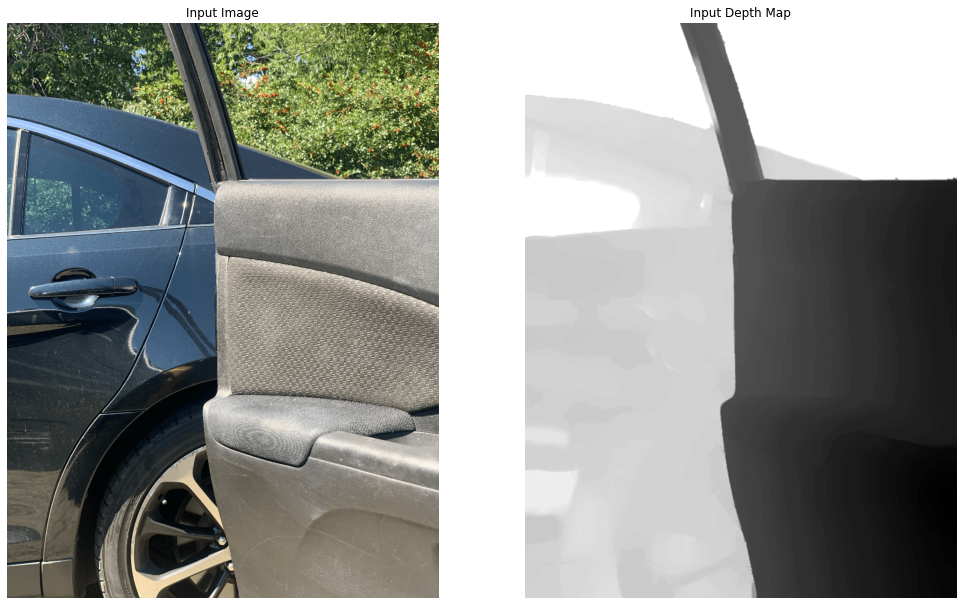

In [3]:
# read image (change filenames for different images)
im = cv2.imread('data/rgb02.png')
depth = cv2.imread('data/depth02.png')

# convert depth map to single channel (HxWx1)
depth = cv2.cvtColor(depth, cv2.COLOR_BGR2GRAY)

# convert image to np.float32 and normalize so values are in [0,1]
#   and swap the color channels
im = np.float32(im) / 255.0
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# [optional] reduce height and width of input (i.e., downsample) to reduce memory and computation time
shrinkfactor = 0.25
im = cv2.resize(im, (0,0), fx=shrinkfactor, fy=shrinkfactor) 
depth = cv2.resize(depth, (0,0), fx=shrinkfactor, fy=shrinkfactor) 

# display input image and depth
plt.rcParams['figure.figsize'] = [17, 15]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Input Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(depth, cmap='gray')
plt.title('Input Depth Map')
plt.axis('off')

# TO DO: Write your code here to selectively blur portions of the image im (based on depth) and display the result


In [4]:
from scipy.ndimage import gaussian_filter

In [5]:
# result = gaussian_filter(im, sigma=1)

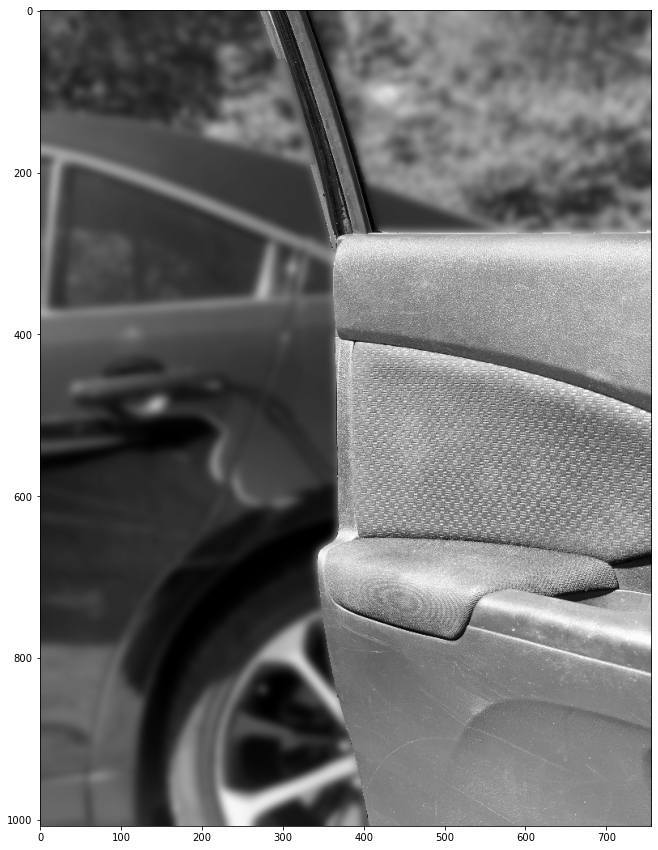

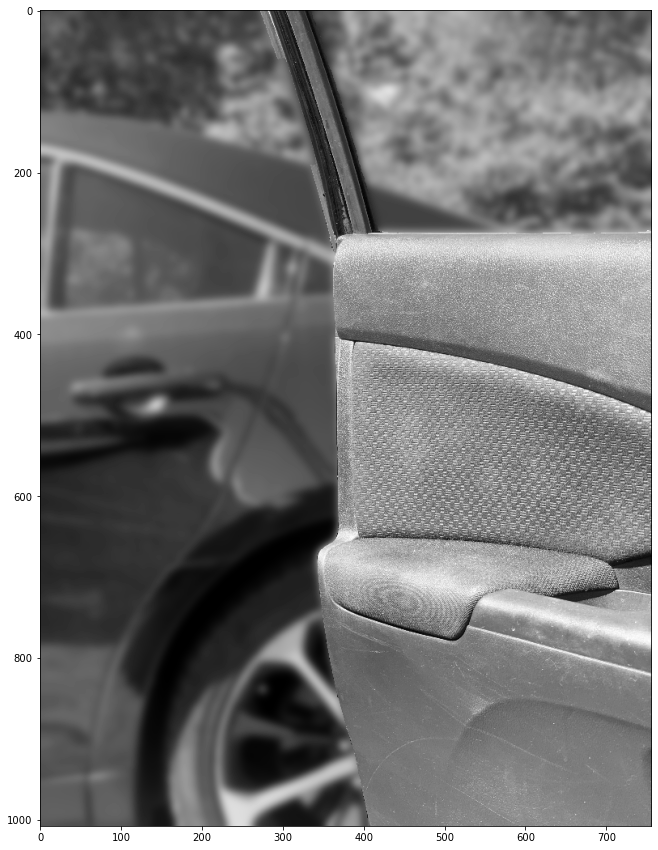

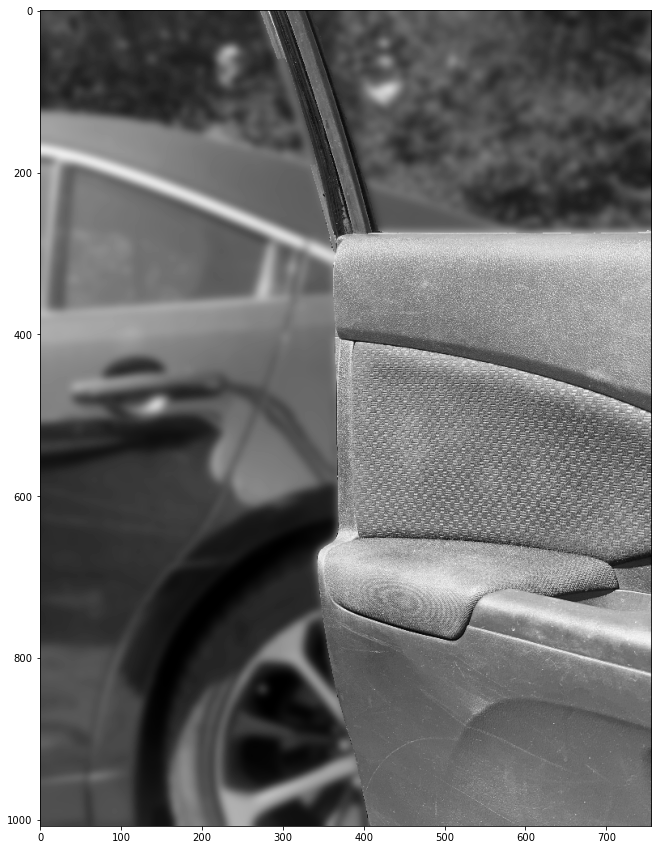

In [6]:
kernel = np.array([
        [1,4,6,4,1],
        [4,16,24,16,4],
        [6,24,36,24,6],
        [4,16,24,16,4],
        [1,4,6,4,1]
    ])

im_all_blurred_RGB = []

thresh = 200

deep_idx = np.where(depth >thresh)    
    
for channel in range(3):
    im_one_channel = im[:,:,channel]
    im_all_blurred = gaussian_filter(im_one_channel, sigma=5)
    im_one_channel[deep_idx] = im_all_blurred[deep_idx]
    im_all_blurred_RGB.append(im_one_channel)
    plt.imshow(im_one_channel, cmap="gray")
    plt.pause(1)
    




In [7]:
# print()

In [8]:
blur_r = np.dstack(im_all_blurred_RGB)
# blur_r = blur_r.permute(2,0,1)
blur_r = blur_r.reshape(1008,756,3)
print(blur_r.shape)

(1008, 756, 3)


# Blurred image, recombined

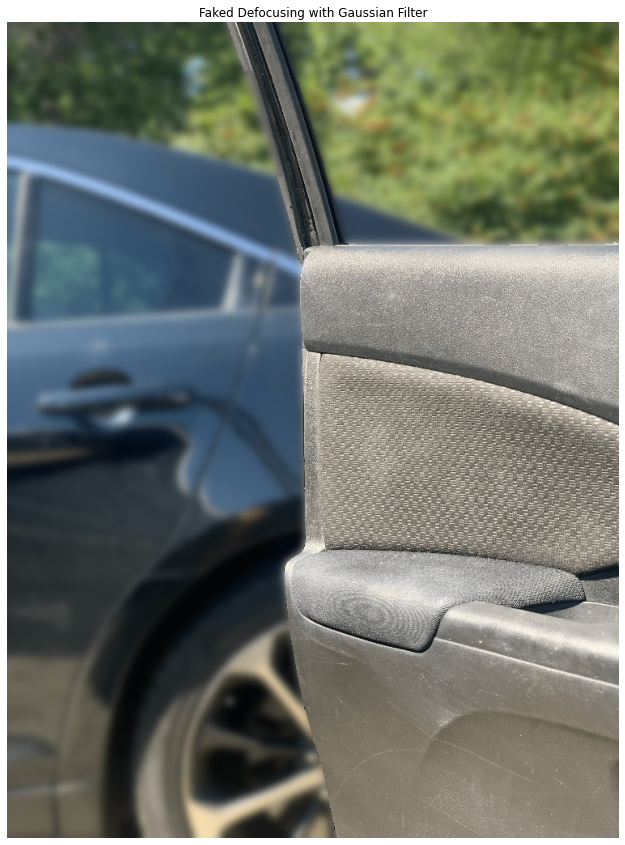

In [13]:
plt.axis('off')
plt.title("Faked Defocusing with Gaussian Filter")
plt.imshow(blur_r)

In [14]:
cv2.imwrite("Defocused_Wisoo_Song_Runjia_Tian.jpg", blur_r)

True